# A Feedforward Neural Network in R with S3 Classes

---

__Elliott Forney - 2020__

In [1]:
x <- seq(-2*pi, 2*pi, length=100)
y0 <- sin(x)
g <- y0 + 0.25 * rnorm(length(x))

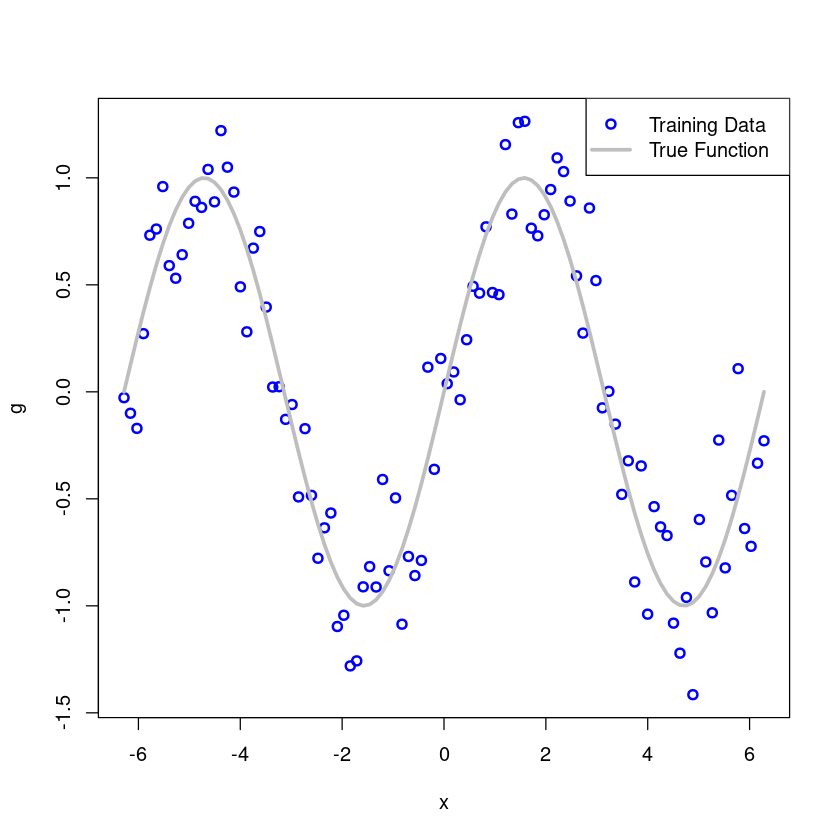

In [2]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
legend("topright", c("Training Data", "True Function"),
       col=c("blue", "grey"), lty=c("blank", "solid"),
       pch=c(1, -1), lwd=c(2, 3))

In [3]:
neuralnet <- function(ni, no, nh, transfer=tanh) {

    hw.scale <- sqrt(3 / ni)
    hw <- matrix(runif((ni+1)*nh, min=-hw.scale, max=hw.scale), ni+1, nh)

    vw.scale <- sqrt(3 / nh)
    vw <- matrix(runif((nh+1)*no, min=-vw.scale, max=vw.scale), nh+1, no)
    
    nnet <- list(ni=ni, no=no, nh=no, hw=hw, vw=vw)
    class(nnet) <- "neuralnet"
    
    invisible(nnet)
}

In [4]:
nnet <- neuralnet(1, 1, 20)
nnet

$ni
[1] 1

$no
[1] 1

$nh
[1] 1

$hw
           [,1]      [,2]       [,3]       [,4]        [,5]      [,6]
[1,] -0.1267947  1.068516 -0.1164504 -0.6654845 -0.01977804 1.1148756
[2,] -1.0973131 -1.578032 -1.2994418  0.3889246  0.56365356 0.7867983
           [,7]      [,8]        [,9]     [,10]      [,11]     [,12]     [,13]
[1,] -0.8838070 -1.427146 -0.04153963  1.335207 -0.0974428 1.2120685 0.7202603
[2,]  0.1485952  0.696262  0.86350096 -1.388645 -1.5066530 0.4776277 1.2535540
          [,14]      [,15]      [,16]      [,17]      [,18]     [,19]
[1,] -0.5465409 -0.5153968 -1.3014746 -1.6802934  0.9135117 0.2479575
[2,]  0.2616526 -0.1896246  0.5666524  0.9919827 -0.3916627 1.1791646
          [,20]
[1,]  1.2050510
[2,] -0.2203848

$vw
              [,1]
 [1,]  0.170340869
 [2,]  0.238693244
 [3,] -0.088941948
 [4,]  0.056099686
 [5,]  0.223452786
 [6,] -0.206235898
 [7,] -0.277325653
 [8,]  0.371423225
 [9,] -0.025415278
[10,] -0.386612325
[11,]  0.163421606
[12,] -0.170773652
[13,] 

In [5]:
# predict is already defined

loss <- function(...)
    UseMethod("loss")

grad <- function(...)
    UseMethod("grad")

fit <- function(...)
    UseMethod("fit")

In [6]:
nnet

$ni
[1] 1

$no
[1] 1

$nh
[1] 1

$hw
           [,1]      [,2]       [,3]       [,4]        [,5]      [,6]
[1,] -0.1267947  1.068516 -0.1164504 -0.6654845 -0.01977804 1.1148756
[2,] -1.0973131 -1.578032 -1.2994418  0.3889246  0.56365356 0.7867983
           [,7]      [,8]        [,9]     [,10]      [,11]     [,12]     [,13]
[1,] -0.8838070 -1.427146 -0.04153963  1.335207 -0.0974428 1.2120685 0.7202603
[2,]  0.1485952  0.696262  0.86350096 -1.388645 -1.5066530 0.4776277 1.2535540
          [,14]      [,15]      [,16]      [,17]      [,18]     [,19]
[1,] -0.5465409 -0.5153968 -1.3014746 -1.6802934  0.9135117 0.2479575
[2,]  0.2616526 -0.1896246  0.5666524  0.9919827 -0.3916627 1.1791646
          [,20]
[1,]  1.2050510
[2,] -0.2203848

$vw
              [,1]
 [1,]  0.170340869
 [2,]  0.238693244
 [3,] -0.088941948
 [4,]  0.056099686
 [5,]  0.223452786
 [6,] -0.206235898
 [7,] -0.277325653
 [8,]  0.371423225
 [9,] -0.025415278
[10,] -0.386612325
[11,]  0.163421606
[12,] -0.170773652
[13,] 

In [7]:
predict.neuralnet <- function(nnet, x) {
    x1 <- cbind(x, 1)
    z <- tanh(x1 %*% nnet$hw)

    z1 <- cbind(z, 1)
    y <- z1 %*% nnet$vw

    y
}

In [8]:
y <- predict(nnet, x)

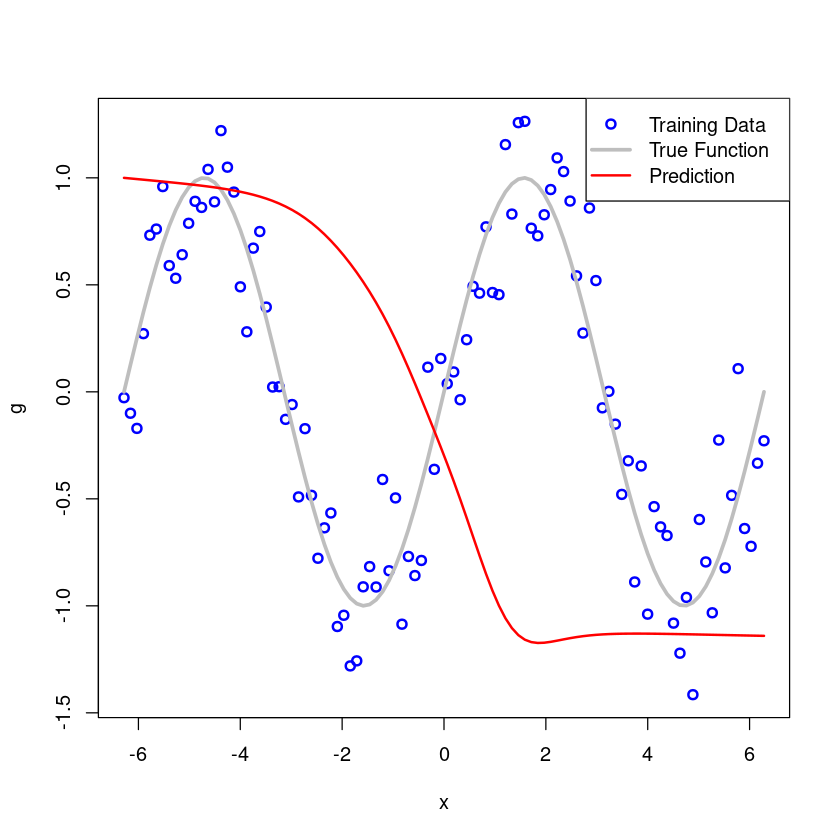

In [9]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
lines(x, y, col="red", lwd=2)
legend("topright", c("Training Data", "True Function", "Prediction"),
       col=c("blue", "grey", "red"), lty=c("blank", "solid", "solid"),
       pch=c(1, -1, -1), lwd=c(2, 3, 2))

In [10]:
grad.neuralnet <- function(nnet, x, g) {
    # forward pass
    x1 <- cbind(x, 1)
    z <- tanh(x1 %*% nnet$hw)
    z1 <- cbind(z, 1)
    y <- z1 %*% nnet$vw

    # error contributions
    delta <- 2 * (y - g) / length(g)

    # derivative of transfer function
    tanh.prime <- function(v) {
        1 - v^2
    }

    # gradient of hidden layer
    hg <- t(x1) %*% (delta %*% t(nnet$vw[-(nnet$nh+1),,drop=FALSE]) * tanh.prime(z))

    # gradient of visible layer
    vg <- t(z1) %*% delta
    
    # loss
    loss <- mean((y - g)^2)

    invisible(list(loss=loss, hg=hg, vg=vg))
}

In [11]:
grad(nnet, x, g)

In [12]:
fit.neuralnet <- function(nnet, x, g, maxiter=1000, lr=0.05) {
    for (iter in 1:maxiter) {
        gradinfo <- grad(nnet, x, g)
        
        if (iter %% 100 == 0)
            print(paste(iter, gradinfo$loss))
        
        nnet$hw <- nnet$hw - lr * gradinfo$hg
        nnet$vw <- nnet$vw - lr * gradinfo$vg
    }
    
    invisible(nnet)
}

In [13]:
nnet <- fit(nnet, x, g)

[1] "100 0.197651194015871"
[1] "200 0.158609233827328"
[1] "300 0.155428667292466"
[1] "400 0.155422290648774"
[1] "500 0.155392829040081"
[1] "600 0.154260053600092"
[1] "700 0.151587435904065"
[1] "800 0.147641219994877"
[1] "900 0.142993215815628"
[1] "1000 0.138180450948614"


In [14]:
y <- predict(nnet, x)

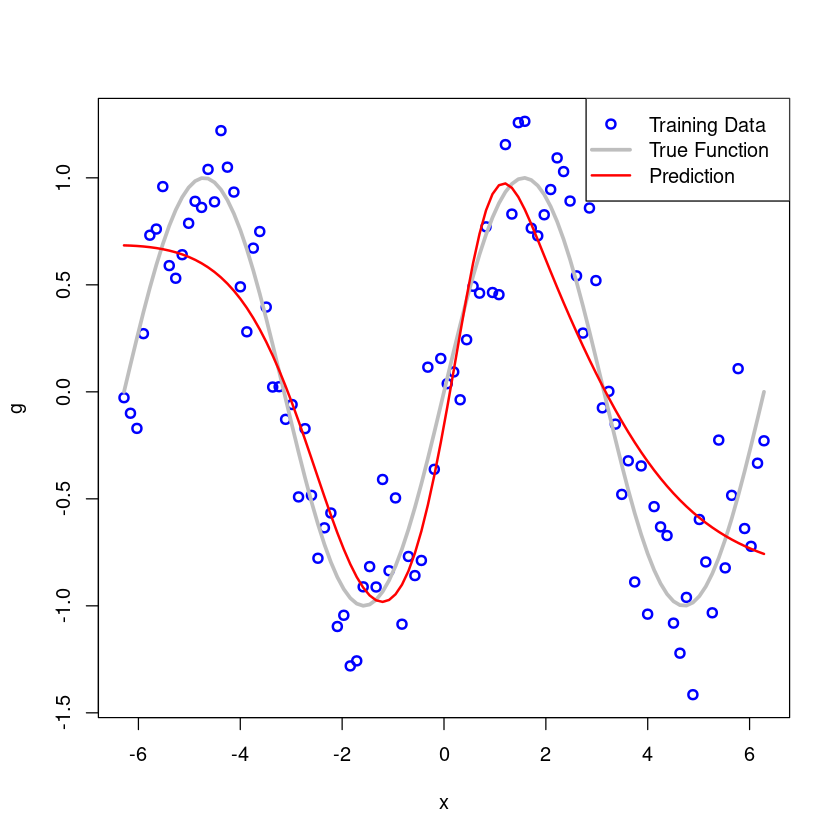

In [15]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
lines(x, y, col="red", lwd=2)
legend("topright", c("Training Data", "True Function", "Prediction"),
       col=c("blue", "grey", "red"), lty=c("blank", "solid", "solid"),
       pch=c(1, -1, -1), lwd=c(2, 3, 2))